<a href="https://colab.research.google.com/github/Chubbyman2/Resume/blob/master/Scikit-Learn_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A comparison of the performance of three classification algorithms included with Scikit-Learn on the Iris dataset.
*   **Gaussian Naive-Bayes Classifier**
*   **Linear Support Vector Classification (SVC)**
*   **K-Neighbours Classifier**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
# Import dataset
datafile = "/content/gdrive/My Drive/iris_dataset.csv"

# Convert to pandas dataframe
iris_data = pd.read_csv(datafile)

In [10]:
# Display different columns and their respective datatypes
iris_data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                object
dtype: object

In [11]:
# Preprocessing data
encoder = preprocessing.LabelEncoder()
iris_data['Sepal Length'] = encoder.fit_transform(iris_data['sepal length (cm)'])
iris_data['Sepal Width'] = encoder.fit_transform(iris_data['sepal width (cm)'])
iris_data['Petal Length'] = encoder.fit_transform(iris_data['petal length (cm)'])
iris_data['Petal Width'] = encoder.fit_transform(iris_data['petal width (cm)'])

iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2,SETOSA,8,14,4,1
1,4.9,3.0,1.4,0.2,SETOSA,6,9,4,1
2,4.7,3.2,1.3,0.2,SETOSA,4,11,3,1
3,4.6,3.1,1.5,0.2,SETOSA,3,10,5,1
4,5.0,3.6,1.4,0.2,SETOSA,7,15,4,1


In [12]:
# Separate features and target variables
cols = [col for col in iris_data.columns if col not in ['target']]
data = iris_data[cols]
target = iris_data['target']
data.head(n=2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2,8,14,4,1
1,4.9,3.0,1.4,0.2,6,9,4,1


In [13]:
# Divide into training and testing sets
# Split 80/20
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.20, random_state = None)

**Gaussian Naive-Bayes Classifier**

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [38]:
gnb = GaussianNB()

# Train algorithm on data
prediction1 = gnb.fit(data_train, target_train).predict(data_test)

# Model accuracy
print("Naive-Bayes Accuracy: ", accuracy_score(target_test, prediction1, normalize=True))

Naive-Bayes Accuracy:  0.9333333333333333


**Linear Support Vector Classification (SVC)**

In [17]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [45]:
svc = LinearSVC(random_state=None)

# Train algorithm on data
prediction2 = svc.fit(data_train, target_train).predict(data_test)

# Model accuracy
print("LinearSVC Accuracy: ", accuracy_score(target_test, prediction2, normalize=True))

LinearSVC Accuracy:  0.9666666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**K-Neighbours Classifier**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [40]:
kneigh = KNeighborsClassifier(n_neighbors=3)

# Train algorithm on data
prediction3 = kneigh.fit(data_train, target_train).predict(data_test)

# Model accuracy
print("K-Neighbors Accuracy: ", accuracy_score(target_test, prediction3))

K-Neighbors Accuracy:  0.9333333333333333


**Performance Comparison**

Visualize how well the three algorithms performed compared to each other.

In [24]:
from yellowbrick.classifier import ClassificationReport

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


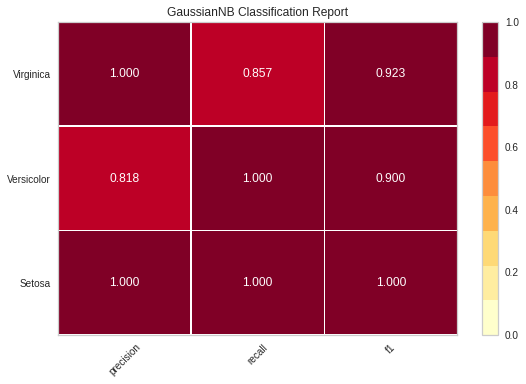

In [41]:
# Gaussian Naive-Bayes
visualizer = ClassificationReport(gnb, classes=["Setosa", "Versicolor", "Virginica"])
visualizer.fit(data_train, target_train) 
visualizer.score(data_test, target_test) 
visualizer.poof() # Display data

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


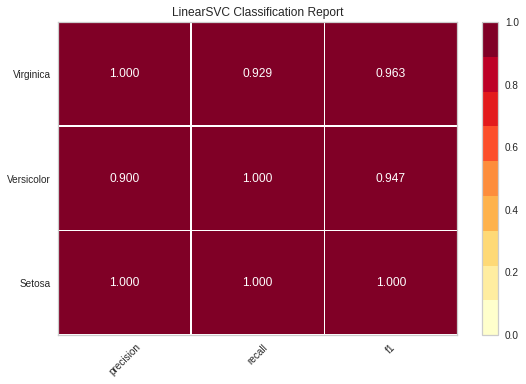

In [46]:
# Linear SVC
visualizer = ClassificationReport(svc, classes=["Setosa", "Versicolor", "Virginica"])
visualizer.fit(data_train, target_train) 
visualizer.score(data_test, target_test) 
visualizer.poof() 

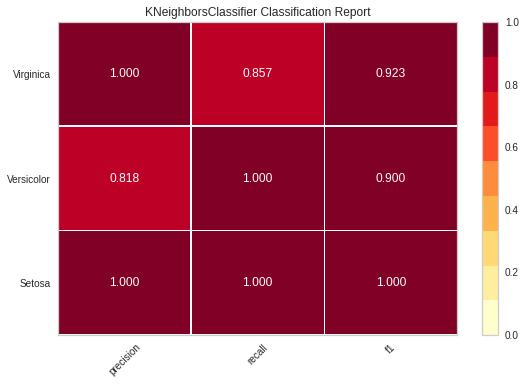

In [43]:
# K-Neighbours
visualizer = ClassificationReport(kneigh, classes=["Setosa", "Versicolor", "Virginica"])
visualizer.fit(data_train, target_train)
visualizer.score(data_test, target_test) 
visualizer.poof() 

**In Conclusion**

All three algorithms perform very well on a simple dataset such as the Iris dataset.

In [44]:
print("Naive-Bayes Accuracy: ", accuracy_score(target_test, prediction1, normalize=True))
print("LinearSVC Accuracy: ", accuracy_score(target_test, prediction2, normalize=True))
print("K-Neighbors Accuracy: ", accuracy_score(target_test, prediction3))

Naive-Bayes Accuracy:  0.9333333333333333
LinearSVC Accuracy:  0.9666666666666667
K-Neighbors Accuracy:  0.9333333333333333
